<a href="https://colab.research.google.com/github/yongjaeahn/python_coding/blob/main/korean/source/11_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

	인공신경망

In [ ]:
import tensorflow as tf

w = tf.Variable(2)
b = tf.Variable(1)

@tf.function
def f(x):
  return w*x + b

y = f(10)

print('f(10) 방정식의 수행결과 (Tensor):',y)
print('f(10) 방정식의 수행결과 (Numpy) :',y.numpy())

f(10) 방정식의 수행결과 (Tensor): tf.Tensor(21, shape=(), dtype=int32)
f(10) 방정식의 수행결과 (Numpy) : 21


	경사하강법 최적화 알고리즘을 활용한 선형 회귀

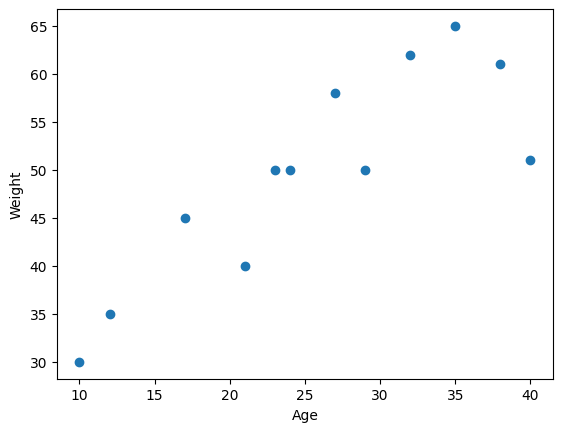

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ages = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
weights = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

plt.scatter(ages,weights)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [ ]:
import numpy as np

x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

epochs = 5000
learning_rate = 0.001

w = np.random.rand()
b = np.random.rand()

for epoch in range(epochs):
  y_hat = w * x + b

  error = np.sum((y - y_hat)**2)

  w_gradient = -2 * np.mean((y - y_hat) * x)
  b_gradient = -2 * np.mean(y - y_hat)

  w = w - learning_rate * w_gradient
  b = b - learning_rate * b_gradient

print('최적화된 w:',w)
print('최적화된 b:',b)

최적화된 w: 1.2191553849300694
최적화된 b: 17.554176384478883


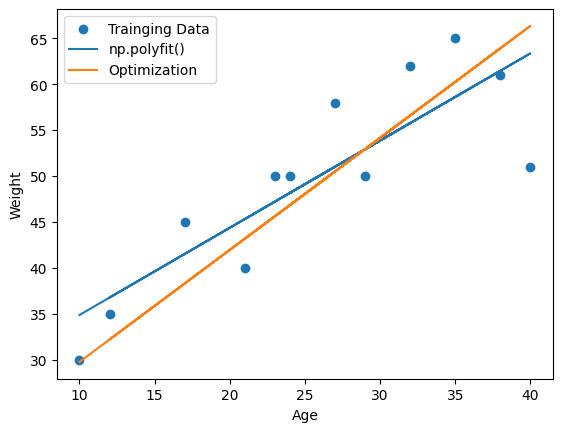

In [ ]:
import matplotlib.pyplot as plt

y1 = 0.95 * x + 25.36   # np.polyfit()으로 구한 회귀방정식
y2 = 1.22 * x + 17.55   # 경사하강 최적화 알고리즘으로 구한 회귀방정식

plt.scatter(x,y,label='Trainging Data')
plt.plot(x,y1,label='np.polyfit()')
plt.plot(x,y2,label='Optimization')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = ages = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = weights = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

w = np.sum(y * (x - x.mean())) / np.sum((x - x.mean())**2)
b = y.mean() - w * x.mean()

print('y =',w,'x + ',b)

y = 0.9501607717041793 x +  25.362540192926062


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([[10],[17],[27],[24],[38],[35],[29],[40],[12],[32],[23],[21]])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

model = LinearRegression()
model.fit(x,y)

print('y =',model.coef_[0],'x + ',model.intercept_)

y = 0.9501607717041805 x +  25.362540192926033


In [ ]:
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
x = np.expand_dims(x,axis=1)
x

array([[10],
       [17],
       [27],
       [24],
       [38],
       [35],
       [29],
       [40],
       [12],
       [32],
       [23],
       [21]])

In [ ]:
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
x = x[:,np.newaxis]
x

array([[10],
       [17],
       [27],
       [24],
       [38],
       [35],
       [29],
       [40],
       [12],
       [32],
       [23],
       [21]])

In [ ]:
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
x = x.reshape(-1,1)
x

array([[10],
       [17],
       [27],
       [24],
       [38],
       [35],
       [29],
       [40],
       [12],
       [32],
       [23],
       [21]])

	인공신경망을 활용한 선형 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 수집 및 전처리
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

# 모델 훈련
model = tf.keras.Sequential()             # 인공신경망 모델 정의
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
model.compile(optimizer='sgd',loss='mse') # 인공신경망 모델 컴파일

model.fit(x,y,epochs=1000,verbose=False)

w, b = model.get_weights()
print("w:", w, "b:", b)

# 모델 테스트
y_pred = model.predict(x)

w: [[nan]] b: [nan]
1/1 [==============================] - 0s 99ms/step


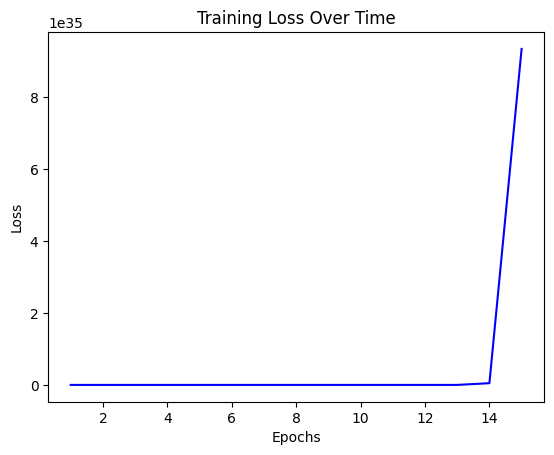

w: [[nan]] b: [nan]
1/1 [==============================] - 0s 36ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 수집 및 전처리
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

# 모델 훈련
model = tf.keras.Sequential()             # 인공신경망 모델 정의
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
model.compile(optimizer='sgd',loss='mse') # 인공신경망 모델 컴파일

history = model.fit(x, y, epochs=1000, verbose=False)

# 손실 값 추이 그래프
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], 'b-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

w, b = model.get_weights()
print("w:", w, "b:", b)

# 모델 테스트
y_pred = model.predict(x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 수집 및 전처리
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

# 모델 훈련
model = tf.keras.Sequential()             # 인공신경망 모델 정의
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
sgd = tf.keras.optimizers.SGD(learning_rate=0.001) # sgd의 Default 학습율은 0.01
#model.compile(optimizer='sgd',loss='mse') # 인공신경망 모델 컴파일
model.compile(optimizer=sgd,loss='mse')   # 인공신경망 모델 컴파일

model.fit(x,y,epochs=1000,verbose=False)

w, b = model.get_weights()
print("w:", w, "b:", b)

# 모델 테스트
y_pred = model.predict(x)

w: [[1.6413829]] b: [5.297775]
1/1 [==============================] - 0s 116ms/step


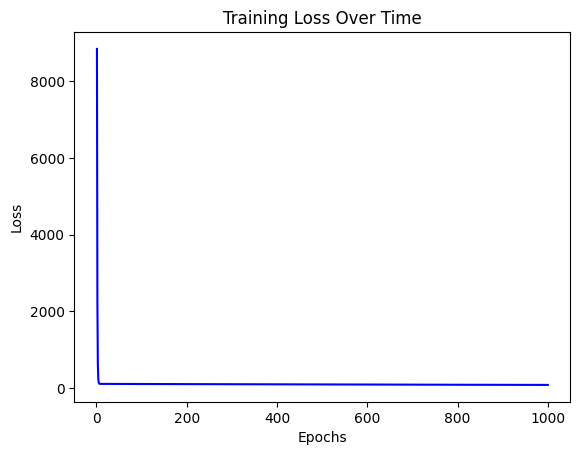

w: [[1.6400262]] b: [5.3371577]
1/1 [==============================] - 0s 41ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 수집 및 전처리
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

# 모델 훈련
model = tf.keras.Sequential()             # 인공신경망 모델 정의
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
sgd = tf.keras.optimizers.SGD(learning_rate=0.001) # sgd의 Default 학습율은 0.01
#model.compile(optimizer='sgd',loss='mse') # 인공신경망 모델 컴파일
model.compile(optimizer=sgd,loss='mse')   # 인공신경망 모델 컴파일

history = model.fit(x, y, epochs=1000, verbose=False)

# 손실 값 추이 그래프
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], 'b-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

w, b = model.get_weights()
print("w:", w, "b:", b)

# 모델 테스트
y_pred = model.predict(x)

In [ ]:
print("숫자 1:",(1))
print("숫자 2:",(2))

숫자 1: 1
숫자 2: 2


In [ ]:
print("튜플 1:",(1,))
print("튜플 2:",(2,))
print("튜플 28*28:",(28*28,))
print("튜플 (1,2):",(1,2))

튜플 1: (1,)
튜플 2: (2,)
튜플 28*28: (784,)
튜플 (1,2): (1, 2)


In [ ]:
expandable_tuple = (1,2,3,)
expandable_list = [(1,2,3),(4,5,6),]
expandable_dict = {1:"one",
                   2:"two",
                   }

In [ ]:
expandable_tuple = (1,2,3,)
expandable_list = [(1,2,3),(4,5,6),]
expandable_dict = {1:"one",
                   2:"two",
                   3:"three",
                   }

In [ ]:
# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y,y_pred)
r_square = r2_score(y,y_pred)
print('평균제곱오차\t:',mse)
print('R 스퀘어\t:',r_square)

평균제곱오차	: 77.43888647717661
R 스퀘어	: 0.287508807570543


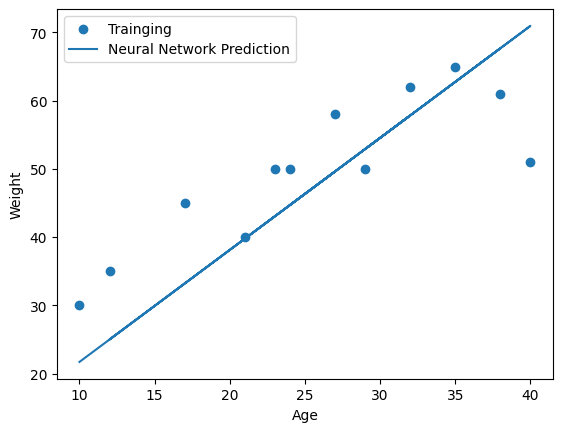

In [ ]:
plt.scatter(x,y,label='Trainging')
plt.plot(x,y_pred,label='Neural Network Prediction')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


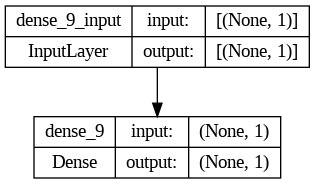

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True,to_file='model.png')

	인공신경망의 활성화 함수

In [ ]:
y_pred = model.predict(x)
print('x가', x[0],'일때의 예측치(model.predict(x)) :', y_pred[0])
print('x가', x[3],'일때의 예측치(model.predict(x)) :', y_pred[3])

w, b = model.get_weights()
print('x가', x[0],'일때의 예측치(y = wx + b) :',w[0] * x[0] + b[0])
print('x가', x[3],'일때의 예측치(y = wx + b) :',w[0] * x[3] + b[0])

1/1 [==============================] - 0s 19ms/step
x가 10 일때의 예측치(model.predict(x)) : [21.696682]
x가 24 일때의 예측치(model.predict(x)) : [44.68702]
x가 10 일때의 예측치(y = wx + b) : [21.696682]
x가 24 일때의 예측치(y = wx + b) : [44.68702]


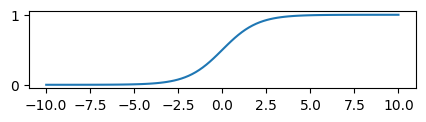

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10,100)
plt.figure(figsize=(5,1))
plt.plot(x,sigmoid(x))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 수집 및 전처리
x = np.array([10,17,27,24,38,35,29,40,12,32,23,21])
y = np.array([30,45,58,50,61,65,50,51,35,62,50,40])

# 모델 훈련
model = tf.keras.Sequential()             # 인공신경망 모델 정의
model.add(tf.keras.layers.Dense(1,input_shape=(1,),activation='sigmoid'))
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd,loss='mse')   # 인공신경망 모델 컴파일

model.fit(x,y,epochs=1000,verbose=False)

# 모델 테스트
y_pred = model.predict(x)
print('x가', x[0],'일때의 예측치(model.predict(x)) :', y_pred[0])
print('x가', x[3],'일때의 예측치(model.predict(x)) :', y_pred[3])

w, b = model.get_weights()
print('x가', x[0],'일때의 예측치(sigmoid(wx + b)) :',sigmoid(w[0] * x[0] + b[0]))
print('x가', x[3],'일때의 예측치(sigmoid(wx + b)) :',sigmoid(w[0] * x[3] + b[0]))

1/1 [==============================] - 0s 44ms/step
x가 10 일때의 예측치(model.predict(x)) : [0.9989569]
x가 24 일때의 예측치(model.predict(x)) : [0.99999994]
x가 10 일때의 예측치(sigmoid(wx + b)) : [0.9989569]
x가 24 일때의 예측치(sigmoid(wx + b)) : [0.9999999]


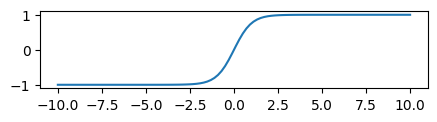

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

x = np.linspace(-10,10,100)
plt.figure(figsize=(5,1))
plt.plot(x,tanh(x))
plt.show()

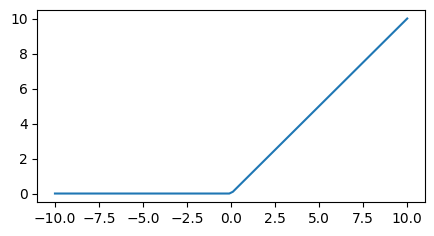

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0,x)

x = np.linspace(-10,10,100)
plt.figure(figsize=(5,2.5))
plt.plot(x,relu(x))
plt.show()

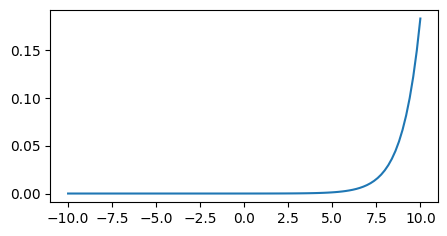

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x) / np.exp(x).sum()

x = np.linspace(-10,10,100)
plt.figure(figsize=(5,2.5))
plt.plot(x,softmax(x))
plt.show()

In [ ]:
x = np.array([3,4,5])
y = softmax(x)
print('y :',y, ', sum(y) :',y.sum())

x = np.array([1,2,1])
y = softmax(x)
print('y :',y, ', sum(y) :',y.sum())

y : [0.09003057 0.24472847 0.66524096] , sum(y) : 1.0
y : [0.21194156 0.57611688 0.21194156] , sum(y) : 1.0


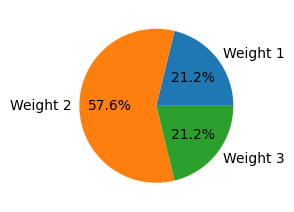

In [ ]:
plt.figure(figsize=(5,2.5))
plt.pie(y,labels=["Weight 1","Weight 2","Weight 3"],autopct='%.1f%%')
plt.show()

	인공신경망을 활용한 로지스틱 회귀

다중 분류

In [ ]:
import tensorflow as tf

# 데이터 수집 및 전처리
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# 인공신경망 모델 정의 및 컴파일
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train,y_train,epochs=10,verbose=True)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print('손실:', loss)
print('정확도:', accuracy)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 24.4291 - accuracy: 0.8293
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9377 - accuracy: 0.8469
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1407 - accuracy: 0.8504
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7117 - accuracy: 0.8527
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4782 - accuracy: 0.8532
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3074 - accuracy: 0.8542
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1684 - accuracy: 0.8570
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0731 - accuracy: 0.8596
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9951 - accuracy: 0.8612
Epoch 10/10
313

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


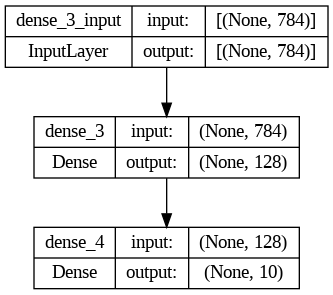

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True,to_file='model.png')

In [ ]:
# 모델 테스트
y_pred = model.predict(x_test[:2])

1/1 [==============================] - 1s 771ms/step


In [ ]:
y_pred

array([[8.6956990e-11, 9.6393594e-21, 1.4316951e-13, 6.9026602e-09,
        1.3132389e-20, 1.1371317e-16, 3.2087849e-25, 1.0000000e+00,
        7.6978446e-13, 2.1195081e-12],
       [9.7935808e-06, 9.8231513e-11, 9.9990034e-01, 4.1102108e-08,
        1.4127086e-36, 8.9762034e-05, 1.3578315e-07, 1.0750448e-34,
        5.2925869e-11, 1.3442215e-28]], dtype=float32)

In [ ]:
print(sum(y_pred[0]),sum(y_pred[1]))

1.0000000069926498 1.0000000736850796


In [ ]:
import numpy as np

np.argmax(y_pred[0])

7

In [ ]:
y_test[0]

7

In [ ]:
np.argmax(y_pred[1])

2

In [ ]:
y_test[1]

2

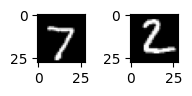

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(x_test[0],(28,28)),cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(x_test[1],(28,28)),cmap='gray')

plt.tight_layout()
plt.show()

이진 분류

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터 수집 및 전처리
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

y_train_odd_or_even = y_train % 2
y_test_odd_or_even = y_test % 2

# 인공신경망 모델 정의 및 컴파일
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train,y_train_odd_or_even,epochs=10,verbose=True)

# 모델 테스트
y_pred = model.predict(x_test)
for i in range(5):      # 데이터의 수가 많아 5까지만 출력
  print('y_pred[',i,']:',y_pred[i])
  if y_pred[i] < 0.5:
    print(y_test[i],': 짝수')
  else:
    print(y_test[i],': 홀수')

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test_odd_or_even)
print('손실:', loss)
print('정확도:', accuracy)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 5.7966 - accuracy: 0.8473
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4778 - accuracy: 0.8593
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3936 - accuracy: 0.8643
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3914 - accuracy: 0.8631
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3895 - accuracy: 0.8655
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4044 - accuracy: 0.8628
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3985 - accuracy: 0.8647
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4000 - accuracy: 0.8667
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3932 - accuracy: 0.8665
Epoch 10/10
31

	CNN  합성곱신경망을 활용한 로지스틱 회귀

다중 분류

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터 수집 및 전처리
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

# 인공신경망 모델 정의 및 컴파일
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train,y_train,epochs=10,verbose=True)

# 모델 테스트
y_pred = model.predict(x_test)
for i in range(5):      # 데이터의 수가 많아 5까지만 출력
    print('실제값:',y_test[i],', 예측값:',np.argmax(y_pred[i]))

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print('손실:', loss)
print('정확도:', accuracy)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 1.1605 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4311 - accuracy: 0.9470
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4067 - accuracy: 0.9514
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4413 - accuracy: 0.9546
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4652 - accuracy: 0.9586
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4695 - accuracy: 0.9611
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4614 - accuracy: 0.9652
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4996 - accuracy: 0.9668
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4652 - accuracy: 0.9704
Epoch 10/10
313/313 [==============================] - 2s 5ms/st

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터 수집 및 전처리
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

# 인공신경망 모델 정의 및 컴파일
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train,y_train,epochs=10,verbose=True)

# 모델 테스트
y_pred = model.predict(x_test)
for i in range(5):      # 데이터의 수가 많아 5까지만 출력
    print('실제값:',y_test[i],', 예측값:',np.argmax(y_pred[i]))

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print('손실:', loss)
print('정확도:', accuracy)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 18s 7ms/step - loss: 1.1761 - accuracy: 0.9128
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4103 - accuracy: 0.9462
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4263 - accuracy: 0.9502
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4670 - accuracy: 0.9527
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4764 - accuracy: 0.9575
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4576 - accuracy: 0.9622
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4666 - accuracy: 0.9647
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5068 - accuracy: 0.9661
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4993 - accuracy: 0.9683
Epoch 10/10
313/

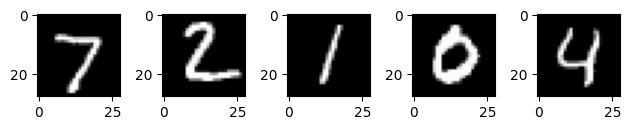

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(np.reshape(x_test[i],(28,28)),cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


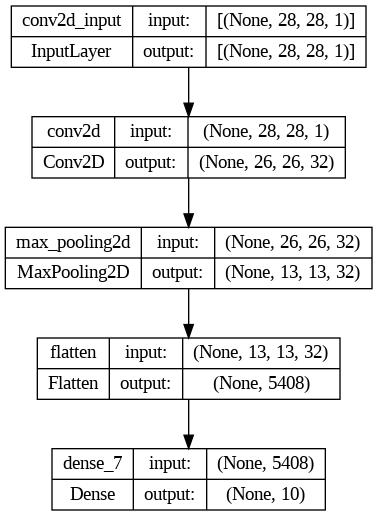

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True,to_file='model.png')

In [ ]:
y_pred = model.predict(x_test[:2])

1/1 [==============================] - 0s 22ms/step


In [ ]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

이진 분류

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터 수집 및 전처리
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

y_train_odd_or_even = y_train % 2
y_test_odd_or_even = y_test % 2

# 인공신경망 모델 정의 및 컴파일
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train,y_train_odd_or_even,epochs=10,verbose=False)

# 모델 테스트
y_pred = model.predict(x_test)
for i in range(5):      # 데이터의 수가 많아 5까지만 출력
  print('y_pred[',i,']:',y_pred[i])
  if y_pred[i] < 0.5:
    print(y_test[i],': 짝수')
  else:
    print(y_test[i],': 홀수')

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test_odd_or_even)
print('손실:', loss)
print('정확도:', accuracy)

313/313 [==============================] - 2s 5ms/step
y_prediction[ 0 ]: [1.]
7 : 홀수
y_prediction[ 1 ]: [4.8362456e-09]
2 : 짝수
y_prediction[ 2 ]: [0.99673444]
1 : 홀수
y_prediction[ 3 ]: [6.4808196e-06]
0 : 짝수
y_prediction[ 4 ]: [5.1047507e-05]
4 : 짝수
313/313 [==============================] - 2s 5ms/step - loss: 0.1947 - accuracy: 0.9513
손실: 0.19472932815551758
정확도: 0.9513000249862671
